# Prologue

Hi! Welcome to the second part of our course. Today, we're going to learn to do some actual webscraping! At the end of lesson, you'll be able to:

<blockquote>
<strong style="color: brown;">
<li>What is Object-oriented programming</li>
<li>What are APIs and webscraping </li>
<li>How to make a request to parse HTML code</li>
<li>How to read HTML code</li>
<li>The Beautiful Soup Library</li>
<li>How to get hold of elements in HTML code with python</li>
<li>What we can do with these elements</li>
</strong>
</blockquote>

At the end of the lesson today, you will be able to scrape any web on your own! Without further ado, let's begin.

# Object-oriented programming

Object-oriented programming (OOP) is a programming model that revolves around the concept of objects, which are instances of classes. It is a way of organizing and structuring code to model real-world entities or abstract concepts.

In OOP, objects are created from class definitions, which act as blueprints or templates for creating objects. A class defines the attributes (data) and behaviors (methods) that an object of that class will have. It may be a very abstract concept right now but here's a good analogy to explain.

Consider a car manufacturer. The blueprint of the car is equivalent to the class in programming, where its brand, model, color, and functionalities (like moving forward) are stated. In order to actually bring the car into the real world, we must create the car using the blueprint, which is equivalent to an object in programming. Just like how manufacturers can produce tons of cars every year, we can also create objects unlimitedly with only one class.

In [ ]:
class Car:
    def __init__(self, brand, model, color):
        self.brand = brand
        self.model = model
        self.color = color

    def start_engine(self):
        print("Engine started.")

    def stop_engine(self):
        print("Engine stopped.")

# Creating objects of the Car class
car1 = Car("Toyota", "Camry", "Blue")
car2 = Car("Honda", "Civic", "Red")

# Accessing object attributes
print(car1.brand)  # Output: Toyota
print(car2.color)  # Output: Red

# Calling object methods
car1.start_engine()  # Output: Engine started.
car2.stop_engine()  # Output: Engine stopped.

In the following course, we're basically using blueprints (classes) designed by other programmers, beacuse the functionalities are well-defined and complete. It is not necessary for us to understand how the blueprints is written, because it is probably too complicated. We only need to know how to USE the blueprints.

When we say 'import a library', what we imply is that we 'take a set of blueprints' (which is free of charge) from others. After getting these blueprints, we will be creating the actual machine (begin coding) and start scraping different websites.

# Application Programming Interfaces (APIs)

When you browse websites, you'll come across with a lot of data. Examples include weather forecast on the HKO website, player and team stats on the NBA website and the trend of stocks. If, say, I'm a stock trader/investor and I would like to retrieve large amounts of stocks data from a website for my further analysis, what should I do? We can use APIs.

An <b>Application Programming Interface</b> is a set of commands, functions, protocols and objects that programmers can use to create software or interact with an external system. We can make an API request to retrieve data or access a service. If the request is valid and structured correctly, the external system (website) will respond appropriately and give the data that you want. However, even with APIs, it is not guaranteed that we can access all pieces of information, as some data may be confidential.

You may think of making an API request like ordering dishes in a restaurant. The menu shows what you can order and what you can't. After informing the waiter (making an API request), he/she will bring the dish you want, which is processed by the chef. Then you can enjoy your meal!

But who are making this request to? The website, right? We call this an API endpoint, which is usually in the form of a URL or URI. The API endpoint enables communication with clients. It's similar to the address of a location.

Here's how we can get hold of data with APIs.

In [ ]:
# Importing the library 'requests'
# Having this library allows us to do other things with a set of pre-written functions
import requests

# Making an API request
# .get() accepts an arugment 'url', which is which API endpoint we want to get data from
response = requests.get(url="http://api.open-notify.org/iss-now.json")

# Detects any errors in response code
response.raise_for_status()

# Printing out the response code
print(response)

# Printing out the response in the form of a python dictionary, a sequence datatype like lists
print(response.json())

{'message': 'success',
 'iss_position': {'latitude': '24.9999', 'longitude': '-128.9422'},
 'timestamp': 1700047714}

As you can see, we have succesfully gotten some data! In fact, this API returns the current location of the ISS (current latitude and longitude of the space station) and takes no inputs. Pretty cool, isn't it?

More about response code: You've heard of the 404 error right? Actually, this is an example of a response code. There are plenty of response code and each has its own meaning. If it is 200/2xx then you're probably good to go. (refer to google.com)

# Why do we need webscraping?

Some websites like twitter don't have API endpoints. That means we can't use APIs request to retrieve data. But fear not, for we have another way of extracting data in the world of programming -- web scraping. It is a more complicated method of extraction of data, but it's compartively more versatile.

# The Beautiful Soup Module

Beautiful Soup is a popular Python library used for web scraping and parsing HTML or XML documents. It provides a convenient way to extract data from web pages by navigating and manipulating the document's structure. In the following lessons, we'll mainly be using this library to scrape webs.

Documentation: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

There are namely four steps in webscraping (and we'll cover all of them in this course):


1.   Fetching
2.   Parsing
3.   Data extraction
4.   Data processing

Today, we're going to scrape the website 'Hacker News' (https://news.ycombinator.com/news).


# HTML code

HTML (Hypertext Markup Language) is the standard markup language used for creating the structure and presenting the content of web pages on the Internet. It is the foundation of the World Wide Web and is understood by web browsers to render the visual representation of a web page.

HTML uses a set of markup tags or elements to define the structure and semantics of the content within a web page. These tags are enclosed in angle brackets and consist of an opening tag, content, and a closing tag. We'll cover more examples later if this sounds confusing to you.

(In short this is just another programming language specialized for writing websites)

# Fetching HTML code

The first step in web scraping is to send HTTP requests to the target website and retrieve the HTML content of the web pages. This can be done using the request library (as demonstrated just now in APIs) in python. Here's the we do it.

In [ ]:
import requests

# This only gets the HTML code of the website instead of a easily readable output because it is not an API endpoint
response = requests.get("https://news.ycombinator.com/news")

# Prints the html code of the website
print(response.text)

As you can see, the output is hundreds of lines of HTML code, which may look very intimidating. But who said this is easy? (it will be eventually once you scrape websites often)

# Parsing HTML code

Once the HTML content is obtained, the next step is to parse the HTML structure to extract the relevant data. BeautifulSoup provide tools for navigating and manipulating HTML documents.

Parsing means analyzing and converting a program into an internal format that a runtime environment can actually run. This lets python understands another programming language like HTML, so you can extract data easily using python.

In [ ]:
from bs4 import BeautifulSoup
webpage = response.text

# Making soup. This method takes in two arguments, the HTML code of the webpage
# and the method by which we're going to parse it
soup = BeautifulSoup(webpage, "html.parser")

There's a reason we call this 'making soup'. Think of a lot of websites as a spaghetti soup. Websites consist of thousands of lines of seemingly incomprehensible code. We would need a special tool to make sense of this 'soup' of jumbled HTML code.

# Understanding HTML tags and Extracting data

Now that the soup is ready, we can start extracting data and make use of the data for other purposes. But first, we must learn what are HTML tags, because it is the foundation of retriving data.

First, we can think of HTML code as a set of building blocks. These blocks are called HTML elements, which represent the different parts or components within a web page and define their structure, content, and behavior. Each HTML element is defined by an opening tag, content (if applicable), and a closing tag.

HTML tags are special markers that define the structure and elements of a web page. These tags are used to identify and extract specific pieces of information from the HTML document. By targeting the appropriate tags, you can retrieve text, links, images, tables, or other elements of interest.

HTML tags are enclosed in angle brackets (< and >). They come in pairs: an opening tag and a closing tag. The opening tag indicates the start of an element, and the closing tag indicates its end. Here are a few examples.



In [ ]:
# You can't run the following lines of code because they're written in HTML and this interpreter only understands python code
# It is commented to prevent any 'errors'

"""e.g. In this example, <p> is the opening tag, and </p> is the closing tag. The content between these tags,
 "This is a paragraph," represents the actual text of the paragraph. """

# <p>This is a paragraph.</p>

"""Here, the <div> tag is the parent element, and the <h1> and <p> tags are 'child elements' within the <div>. The <div>,
meanwhile, is the 'parent element' of the <h1> and <p>. The structure created by these tags helps organize and define the
different parts of the web page."""

# <div>
#   <h1>Welcome to my website!</h1>
#   <p>This is a paragraph of text.</p>
# </div>


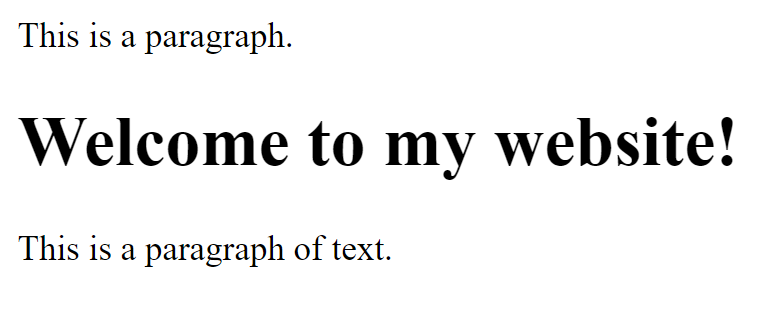

For example, on YouTube, HTML divides the page into different sections, such as the header, navigation menu, content area, and footer. Each section is represented by specific HTML elements, enclosed by specific tags.

Commonly used HTML tags include:



*   \<html>: Represents the root element of an HTML document.
*   \<head>: Contains meta-information about the HTML document, such as the title and links to external stylesheets or scripts.
*   \<body>: Represents the main content of the HTML document.
*   \<h1>, \<h2>, \<h3>, \<h4>, \<h5>, \<h6>: Headings of various levels, with \<h1> being the highest (most important) and \<h6> being the lowest.
*   \<p>: Represents a paragraph of text.
*   \<a>: Creates a hyperlink and is used for linking to other web pages or resources.
*   \<img>: Embeds an image in the web page.
*   \<ul>: Represents an unordered (bulleted) list.
*   \<ol>: Represents an ordered (numbered) list.
*   \<li>: Represents an item in a list (\<ul> or \<ol>).
*   \<div>: Defines a division or section within an HTML document.
*   \<span>: Inline container used to group and style a small section of text or elements.
*   \<form>: Represents an HTML form for user input.
*   \<input>: Creates an input field within a form, such as a text input, checkbox, or radio button.
*   \<button>: Creates a clickable button.
*   \<label>: Represents a label for an input field.


Or check out the full list of tags at https://www.javatpoint.com/html-tags

Let's get back to the world of python. Once the HTML is parsed, you can navigate the structure of the document using various methods and properties provided by Beautiful Soup. Some common methods include find() to find the first occurrence of a specific element, find_all() to find all occurrences of an element, or select() to use CSS selectors for more complex queries. Here's how we do it.

In [ ]:
# Find the element with the <title> tag
print(soup.title)

# Using the find() method
# Find the FIRST <h1> element
h1_element = soup.find(name='h1')
print(h1_element)  # Prints None, which means there is no element with the tag <h1>

# Using the find_all() method
# Find ALL <a> elements
a_elements = soup.find_all(name='a')
for a in a_elements:
    print(a.getText())
    print(a.get("href"))


As you can see, we got a lot of links and everything seems out of place. This is why we need better ways to find and organize the data.

# CSS selectors

Another good way to navigate through the webpage and get hold of certain elements is to use CSS selectors. CSS (Cascading Style Sheets) selectors are patterns used to select and target specific HTML elements on a web page. CSS selectors define the elements to which a particular set of CSS rules should be applied. They play a crucial role in styling and manipulating the appearance of web pages.


In [ ]:
"""
/* CSS code */
p {
  color: blue;
  background-color: lightgray;
}

h1 {
  color: red;
  background-color: yellow;
}
"""

In [ ]:
# Select all <p> elements
paragraphs = soup.select('p')
for p in paragraphs:
    print(p.text)

# Select all <span> elements with the class "titleline"
# A complete list of all the articles present
articles = soup.find_all(name="span", class_="titleline")

# Looping through the list and printing the titleline of every article
for article_tag in articles:
    text = article_tag.find(name="a").getText()
    print(text)

As you can see, we got all the titlelines of every piece of news on the main page of the website.

# Other webscraping tips

1.   Use google chrome, open the web you're scraping, right-click and press 'inspect'. This shows the HTML code of the website and you can follow the structure pretty well.
2.   Google chrome offers well-built extensions and functions for web scraping. For example, there's a box-arrow button on the top left corner once you're followed tip 1. Press that button and click on anywhere to inspect the code of that particular element. This will help you trace the tags quicker.
3.   Go to poe.com and use AI if you're still unfamiliar with some concepts or if you just want to learn more about webscraping. It provides example code with high readability.
4.   Use a bigger monitor if possible because viewing hundreds of lines of code on a small screen can damage your eyes (optional).
5.   Seek help from stackoverflow. It's a platform where coders ask and answer questions (usually about how to fix errors in their code). If you encountered a bug in your code, maybe some other coders would have experienced that as well before.
6.   Try to comment your code at first and don't be afraid to fix your code in any way. You can just undo everything anytime if something goes wrong.



# Final Challenge

*   Put all the links, titlelines, and number of upvotes into three separate lists in order
*   Using the data above, find the article with the most number of upvotes and print the titleline and the link  of that article

Hints:

*   Use .find(), .find_all() with specified arguments (e.g. class_)
*   Use list comprehension or the .append() method
*   Get the required information within the for loop. (You'll need 2 for loops if not mistaken)
*   Remember what you learnt about list index for the second requirement
*   The max() method can find the largest number in a list of numbers



In [ ]:
# Write your code here

# SOLUTION CODE
texts = []
links = []

for article_tag in articles:
    text = article_tag.find(name="a").getText()
    texts.append(text)
    link = article_tag.find(name="span", class_="sitestr").getText()
    links.append(link)

upvotes = [int(score.getText().split()[0]) for score in soup.find_all(name="span", class_="score")]
largest_no = max(upvotes)
largest_index = upvotes.index(largest_no)
print(texts[largest_index])
print(links[largest_index])

print(texts)
print(links)
print(upvotes)

Blender 16yo winner of UK young animator of the year
younganimator.uk
['DOS_deck: Play DOS games in the browser with full controller support', 'Printed robots with bones, ligaments, and tendons', 'Operating an Entire Company on a Minimal Two-Core PostgreSQL Instance, Part 1', 'Smart drugs reduce quality of effort, and slow decision-making', 'Blender 16yo winner of UK young animator of the year', "OiNK's Pink Palace was shut down 16 years ago", 'The truth is always made of details', 'YouTube cracks down on synthetic media with AI disclosure requirement', 'Serverless development experience for embedded computer vision', 'Show HN: Convert any screenshot into clean HTML code using GPT Vision (OSS tool)', 'The push to save the Itanium architecture in Linux', 'B-trees in Factorio', 'Push ifs up and fors down', 'SpaceX Starship/Super Heavy OFT-2 Launch Authorized', "'No one else is saving it': the fight to protect a historic music collection", 'I think I need to go lie down', 'The Great Sphin

# Summary

Congratulations if you've solved the final challenge, and don't be disheartened if you failed. I myself had to spend hours on one webscraping challenge in the past (yes, and still to this day I have to devote a huge amount of time on debugging random stuff). As practice makes perfect, I believe you'll get there eventually.

In this lesson, we've learnt about APIs and the four common steps in webscraping -- fetching, parsing, data extraction and data processing. We've also covered some HTML and CSS, which are 2 programming languages that are used in building websites. You don't actually need to know how to write HTML or CSS, but rather you just have to understand its syntax so you can easily target the data you want to scrape.

We'll do more practices next lesson and answer your questions if any. But, for now, just recap what you've learnt, take a good rest. Our journey of webscraping awaits you next week!